In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


###Necessary Libraries

In [2]:
import re  # For preprocessing
import pandas as pd  # For data handling
from time import time  # To time our operations
from collections import defaultdict  # For word frequency

import spacy  # For preprocessing

import logging  # Setting up the loggings to monitor gensim
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)

In [3]:
df_control = pd.read_csv('/content/gdrive/MyDrive/Carephasia_Data_Cleaned/Cleaned_All/control_data_clean.csv')
df_patient = pd.read_csv('/content/gdrive/MyDrive/Carephasia_Data_Cleaned/Cleaned_All/patient_data_clean.csv')
df_patient.head()

,text
0,well I could I could talk youknow
1,remember
2,when it was like the end of August
3,it was infact it was Labor Day
4,but I youknow I I when I was sick I didnt I I ...


In [4]:
df_patient.isnull().sum()
# df_control.isnull().sum()

text    445
dtype: int64

In [5]:
# Remove empty rows
df_patient.dropna(inplace=True)
df_control.dropna(inplace=True)


In [6]:
df_patient.reset_index(drop=True, inplace=True)
df_control.reset_index(drop=True,inplace= True)
df_patient

,text
0,well I could I could talk youknow
1,remember
2,when it was like the end of August
3,it was infact it was Labor Day
4,but I youknow I I when I was sick I didnt I I ...
...,...
38861,the the the the a the peanut butter and jelly
38862,jelly
38863,jelly on the step s
38864,and there you go


In [38]:
# baaje result ashchilo still a result
nlp = spacy.load("en_core_web_md")
def calculate_avg_semantic_error(text):
    # Parse the text into a spaCy doc object
    doc = nlp(text)

    # Initialize a list to store similarity scores
    similarity_scores = []

    # Iterate over each token in the doc
    for token in doc:
        # Check if the token is a noun or verb
        if token.pos_ in ['NOUN', 'VERB']:
            # Get the head noun or verb of the phrase containing the token
            head = token.head

            # Calculate the similarity between the token and its head
            similarity = token.similarity(head)

            # If the similarity is valid, append it to the list
            if similarity is not None:
                similarity_scores.append(similarity)

    # Calculate the average similarity score
    if similarity_scores:
        avg_similarity = sum(similarity_scores) / len(similarity_scores)
    else:
        avg_similarity = None

    return avg_similarity

In [ ]:

import spacy
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Load spaCy with pre-trained word embeddings
nlp = spacy.load("en_core_web_md")

def calculate_intrasentence_similarity(sentence):
    # Get word embeddings for each word in the sentence
    embeddings = [word.vector for word in nlp(sentence) if word.has_vector]

    if not embeddings:
        # If no word has a vector, return a low similarity score
        return 0.0

    # Calculate cosine similarity between word embeddings
    similarity_matrix = cosine_similarity(embeddings)

    # Calculate the average similarity across all pairs
    average_similarity = np.mean(similarity_matrix)

    return average_similarity

In [29]:
df_patient['intra_sentence_similarity'] = df_patient['text'].apply(calculate_intrasentence_similarity)
df_patient

,text,intra_sentence_similarity
0,well I could I could talk youknow,0.405498
1,remember,1.000000
2,when it was like the end of August,0.265344
3,it was infact it was Labor Day,0.308492
4,but I youknow I I when I was sick I didnt I I ...,0.300084
...,...,...
38861,the the the the a the peanut butter and jelly,0.458418
38862,jelly,1.000000
38863,jelly on the step s,0.261742
38864,and there you go,0.418984


from matplotlib import pyplot as plt
df_patient['intra_sentence_similarity'].plot(kind='hist', bins=20, title='intra_sentence_similarity')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_patient['intra_sentence_similarity'].plot(kind='line', figsize=(8, 4), title='intra_sentence_similarity')
plt.gca().spines[['top', 'right']].set_visible(False)

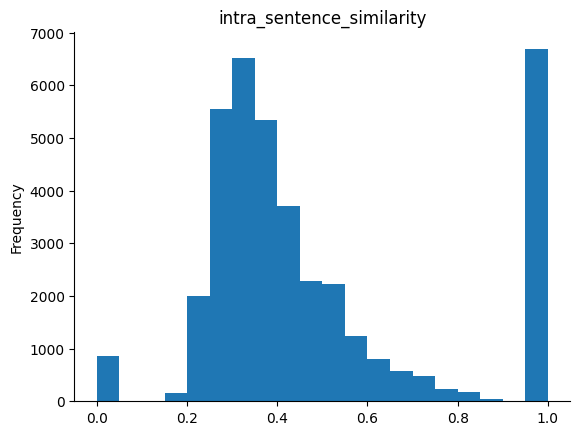

In [32]:
from matplotlib import pyplot as plt
df_patient['intra_sentence_similarity'].plot(kind='hist', bins=20, title='intra_sentence_similarity')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [30]:
df_control['intra_sentence_similarity'] = df_control['text'].apply(calculate_intrasentence_similarity)

df_control

,text,intra_sentence_similarity
0,alright,1.000000
1,a a specific event or,0.472162
2,and that was a once in a lifetime kind of expe...,0.344263
3,I was with initially five other people,0.337088
4,two of them dropped out partway through the trip,0.297482
...,...,...
30331,nope,1.000000
30332,taking her off,0.445939
30333,and Im,0.279715
30334,and,1.000000


from matplotlib import pyplot as plt
df_control['intra_sentence_similarity'].plot(kind='hist', bins=20, title='intra_sentence_similarity')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_control['intra_sentence_similarity'].plot(kind='line', figsize=(8, 4), title='intra_sentence_similarity')
plt.gca().spines[['top', 'right']].set_visible(False)

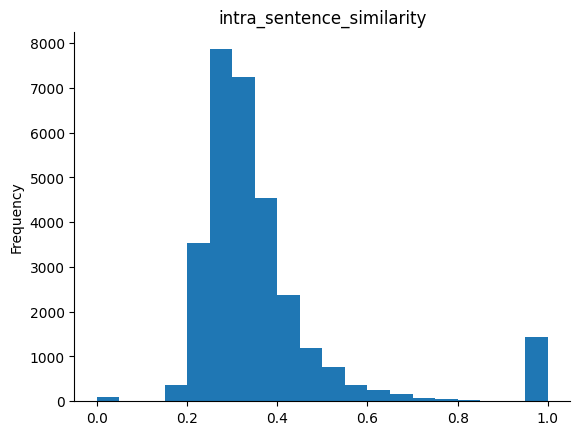

In [31]:
from matplotlib import pyplot as plt
df_control['intra_sentence_similarity'].plot(kind='hist', bins=20, title='intra_sentence_similarity')
plt.gca().spines[['top', 'right',]].set_visible(False)

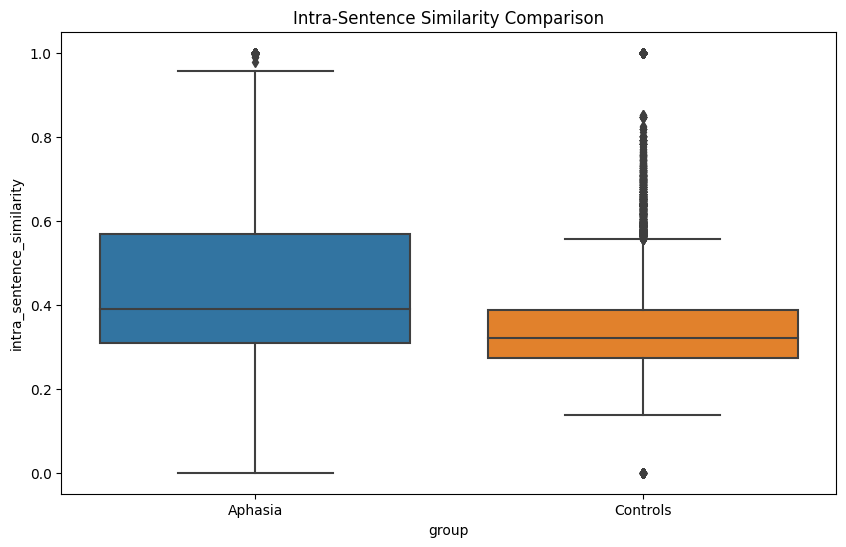

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Concatenate the two DataFrames into one for easy plotting
df_combined = pd.concat([df_patient.assign(group='Aphasia'), df_control.assign(group='Controls')])

# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='group', y='intra_sentence_similarity', data=df_combined)
plt.title('Intra-Sentence Similarity Comparison')
plt.show()

In [39]:
from google.colab import files
df_patient.to_csv('patient_data_semantic.csv', index=False)
files.download('patient_data_semantic.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [40]:
from google.colab import files
df_control.to_csv('control_data_semantic.csv', index=False)
files.download('control_data_semantic.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>